# NYC collisions in 2021 have been analyzed: 
## High-risk areas: Brooklyn and Queens
 
### *Possible contributing factors:* presense of two main airports of JFK, LaGuardia.
#### --other factors-- city infrastructure, weather, and type of vehicle involved in crashes, that we explore more later.

### Objectives:

1. Demonstrate ability to retrieve data from external sources through API.
2. Showcase the ability to investigate, and preprocessing the data for analysis.
3. Pinpoint the crashes on the map using folium library.
4. Get the total counts for each location on the bar graph using matplotlib library.
5. Try to find contributing factors in collisions on the high risk area.


### Python libraries:
* pip install matplotlib
* pip install folium
* pip install nominatim-db nominatim-api
* pip install geopy

### Functions and their goals:

#### *main():* call out for all functions, and draw bar graph for high risk areas.

#### *process_data():* retrieve the data from the external source through API, clean and preprocess data, return a dictionary which contains list of zip codes and their corresponding values for total_injured and total_killed.

#### *coordinates():* convert the zip code to the corresponding coordinates.

#### *interactive_map():* set the data points on NYC map


### main() function exhibition:

In [ ]:
import sys
import requests
import csv
import json
import time
import folium
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

YEAR = "2021"

def main():
    try:
        # Load the data from other functions.
        processed_results = process_data()
        coordinates_dict = coordinates(processed_results)
        interactive_map(coordinates_dict)
        coord_list = coordinates_dict
        # Create lists to add to them in the loop.
        location_labels = []
        injured_totals = []
        killed_totals = []
        # In the dictionary of coord_list, based on latitude / longitude how many injured / killed.
        for (latitude, longitude), (total_injured, total_killed) in coord_list.items():
            injured_count = int(total_injured)
            killed_count = int(total_killed)
            # Add to the lists and sort the counts for injured/killed - totals.
            if injured_count > 1 or killed_count > 0:
                label = f"({str(latitude)[:6]}, {str(longitude)[:6]})"
                location_labels.append(label)
                injured_totals.append(injured_count)
                killed_totals.append(killed_count)
                injured_totals = sorted(injured_totals, reverse=True)
                killed_totals = sorted(killed_totals, reverse=True)
        # Make a graph for all data points, stack killed_total on top of injured_total.
        if location_labels:
            plt.figure(figsize=(10, 5))
            plt.bar(location_labels, injured_totals, label='Injured', color='orange')
            plt.bar(location_labels, killed_totals, bottom=injured_totals, label='Killed', color='firebrick')
            plt.xlabel("Latitude / Longitude") # Label x axis based on location.
            plt.ylabel("Total Count (Injured + Killed)") # Lable y axis based on total count.
            plt.title("Total Injured and Killed per Location (Stacked)")
            plt.xticks(rotation=45, ha='right', fontsize=8) # Tilt the location on x axis for better read.
            plt.legend() # Show the legend
            plt.tight_layout()
            plt.savefig("Collisions_Stacked.png") # Save the graph.
            plt.show()
    except Exception as e: # Catch any error that might happen.
        print(f"An error occurred: {e}")
        print("Could not process data.")
        sys.exit(1)

##### Skipping the long code snippets for process_data, coordinates, and interactive_map function.

## Presenting results on the NYC map and bar graph:

#### Interactive map created:
![NYC map - Collisions.png](<attachment:NYC map - Collisions.png>)
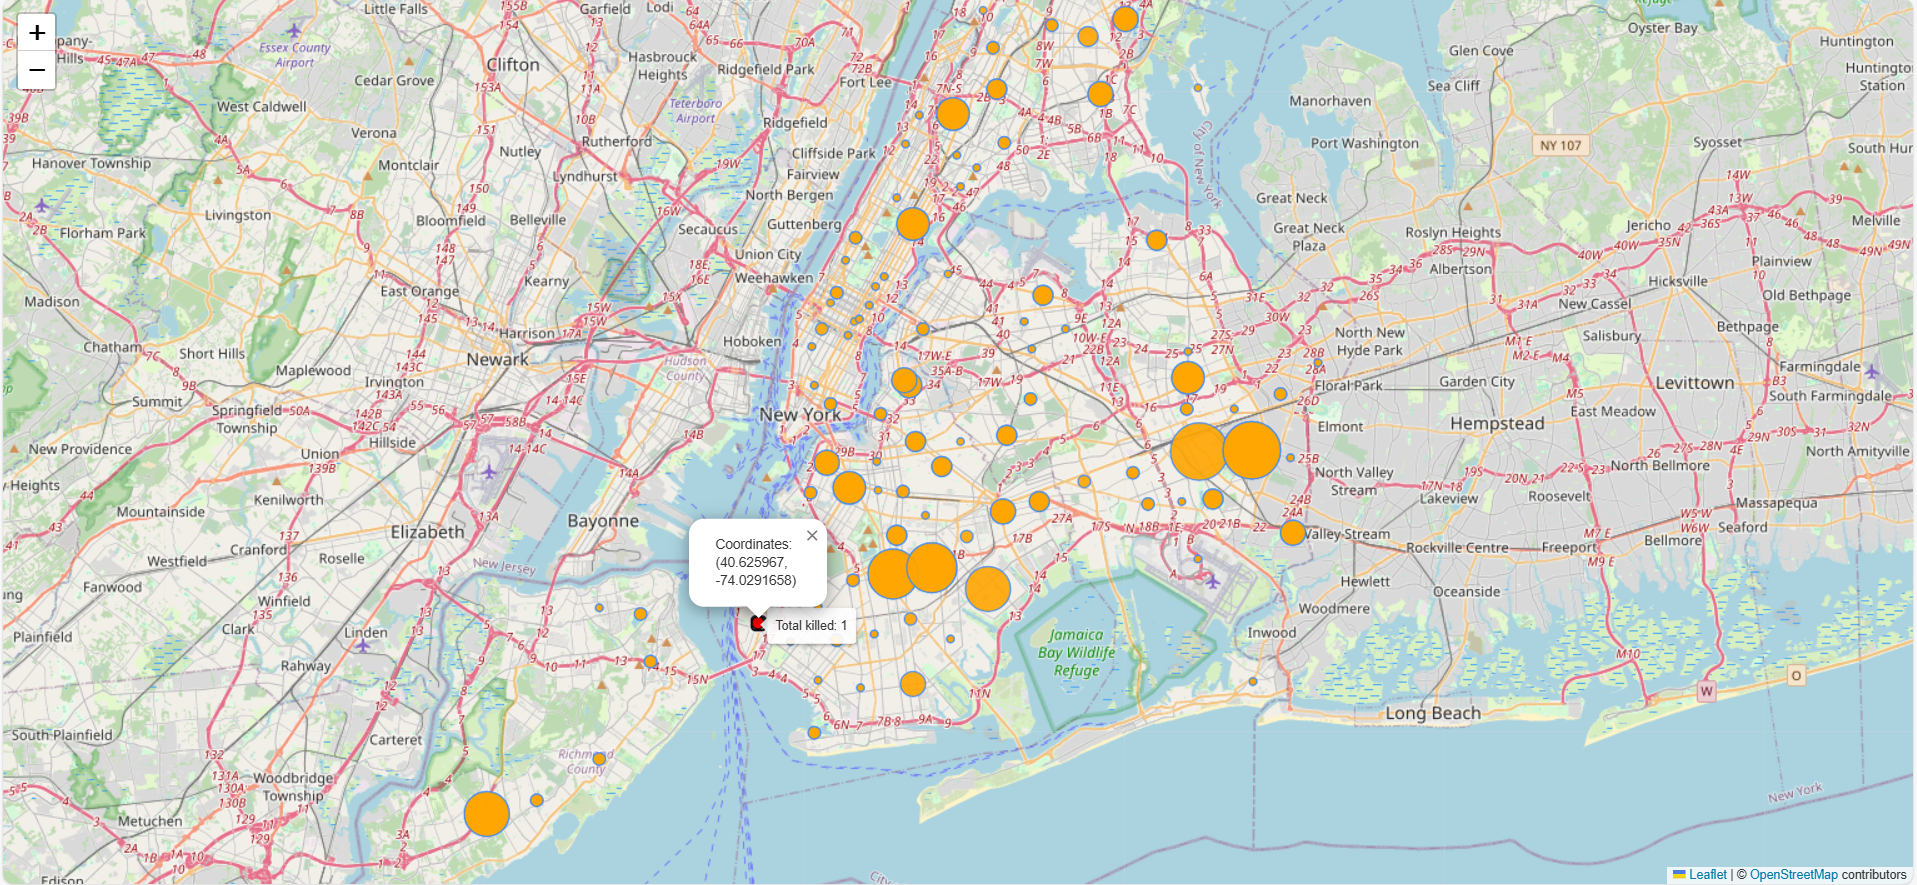

#### Bar graph showing high-risk areas created:
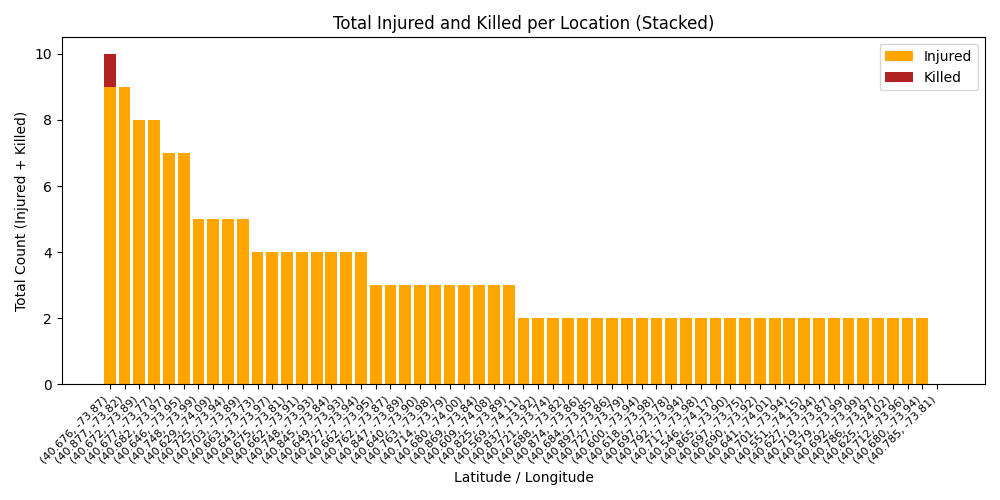